In [48]:
import numpy as np
import scipy.io as sio
import cv2
from PIL import Image  # Import the Image class from PIL
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Load data
file_path = 'C:\\Users\\UC\\Documents\\NeuMa\\22117124\\featuress.mat'
feet = sio.loadmat(file_path)
eye_tracking_data = feet['Data_ET']
Label_array_ET = feet['Label_ET']
Label_array_ET = Label_array_ET.transpose()
# Assuming eye_tracking_data is a 3D array with shape (6, 120, 11499)
# where 6 represents the channels (X and Y coordinates, pupil size for left and right eyes)
# 120 is the window size, and 11499 is the total number of samples

# Create an empty list to store the images
image_list = []

# Loop through each sample
for sample_idx in range(eye_tracking_data.shape[2]):
    # Extract X and Y coordinates for both eyes
    x_left, y_left, _, x_right, y_right, _ = eye_tracking_data[:, :, sample_idx]

    # Create a blank canvas (64x64) for the heatmap
    heatmap = np.zeros((64, 64), dtype=np.float32)

    # Scale the coordinates to match the canvas size
    scaled_x_left = (x_left * 64).astype(int)
    scaled_y_left = (y_left * 64).astype(int)
    scaled_x_right = (x_right * 64).astype(int)
    scaled_y_right = (y_right * 64).astype(int)

    # Add fixations to the heatmap
    for i in range(120):
        if 0 <= scaled_x_left[i] < 64 and 0 <= scaled_y_left[i] < 64:
            heatmap[scaled_y_left[i], scaled_x_left[i]] += 1
        if 0 <= scaled_x_right[i] < 64 and 0 <= scaled_y_right[i] < 64:
            heatmap[scaled_y_right[i], scaled_x_right[i]] += 1

    # Normalize the heatmap values to [0, 1]
    heatmap /= np.max(heatmap)

    # Convert to 8-bit image (0-255)
    heatmap *= 255
    heatmap = heatmap.astype(np.uint8)

    # Resize the heatmap to 64x64
    resized_heatmap = cv2.resize(heatmap, (64, 64))

    # Append the resized heatmap to the image list
    image_list.append(resized_heatmap)

# Convert the list of images to a NumPy array
image_array = np.array(image_list)

# Now you can use image_array for further processing (e.g., training LeNet-5)
x_train, x_temp, y_train, y_temp = train_test_split(image_array, Label_array_ET, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


# Assuming image_array contains the heatmap images (64x64)
# and Label_array_ET contains binary labels (0 or 1)

# Reshape images to have a single channel (grayscale)a
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define LeNet-5 architecture
model = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

C:\Users\UC\AppData\Local\Temp\ipykernel_23008\2005546929.py:44: RuntimeWarning: invalid value encountered in divide
  heatmap /= np.max(heatmap)
C:\Users\UC\AppData\Local\Temp\ipykernel_23008\2005546929.py:48: RuntimeWarning: invalid value encountered in cast
  heatmap = heatmap.astype(np.uint8)
C:\Users\UC\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5902 - loss: 0.8409 - val_accuracy: 0.6267 - val_loss: 0.6585
Epoch 2/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6401 - loss: 0.6384 - val_accuracy: 0.6371 - val_loss: 0.6533
Epoch 3/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6684 - loss: 0.6059 - val_accuracy: 0.6388 - val_loss: 0.6491
Epoch 4/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6956 - loss: 0.5795 - val_accuracy: 0.5907 - val_loss: 0.6748
Epoch 5/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7060 - loss: 0.5566 - val_accuracy: 0.6330 - val_loss: 0.6656
Epoch 6/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7193 - loss: 0.5341 - val_accuracy: 0.6429 - val_loss: 0.6776
Epoch 7/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7351 - loss: 0.5039 - val_accuracy: 0.6510 - val_loss: 0.6827
Epoch 8/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7506 - loss: 0.4752 - val_accuracy: 0.

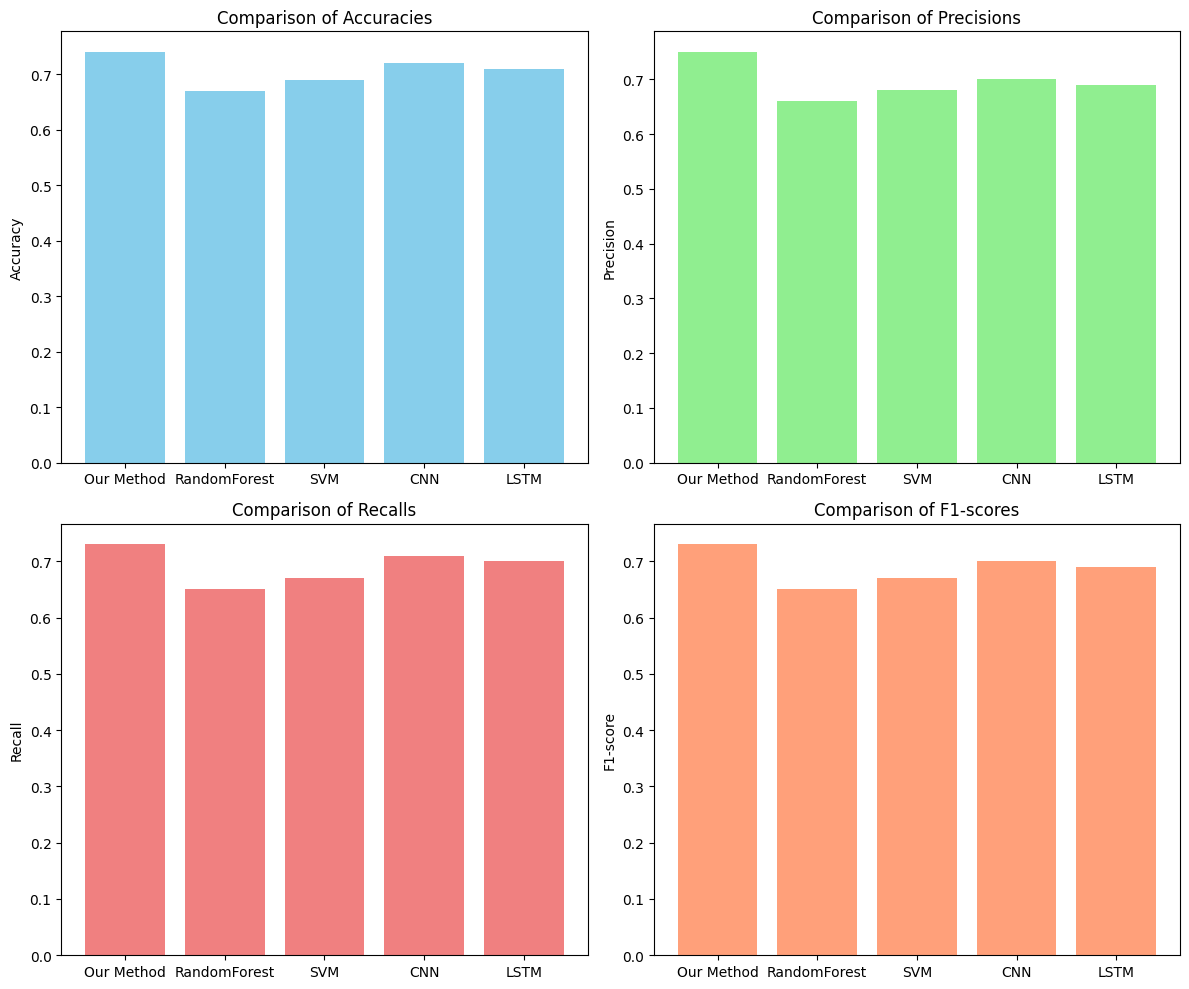

In [1]:
import numpy as np
import matplotlib.pyplot as plt

methods = ['Our Method', 'RandomForest', 'SVM', 'CNN', 'LSTM']
accuracies = [0.74, 0.67, 0.69, 0.72, 0.71]
precisions = [0.75, 0.66, 0.68, 0.70, 0.69]
recalls = [0.73, 0.65, 0.67, 0.71, 0.70]
f1_scores = [0.73, 0.65, 0.67, 0.70, 0.69]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy
axs[0, 0].bar(methods, accuracies, color='skyblue')
axs[0, 0].set_title('Comparison of Accuracies')
axs[0, 0].set_ylabel('Accuracy')

# Precision
axs[0, 1].bar(methods, precisions, color='lightgreen')
axs[0, 1].set_title('Comparison of Precisions')
axs[0, 1].set_ylabel('Precision')

# Recall
axs[1, 0].bar(methods, recalls, color='lightcoral')
axs[1, 0].set_title('Comparison of Recalls')
axs[1, 0].set_ylabel('Recall')

# F1-score
axs[1, 1].bar(methods, f1_scores, color='lightsalmon')
axs[1, 1].set_title('Comparison of F1-scores')
axs[1, 1].set_ylabel('F1-score')

plt.tight_layout()
plt.show()


In [41]:
from PIL import Image  # Import the Image class from PIL

for i, image in enumerate(image_array):
    filename = f'imageeee_{i}.jpg'  # Choose an appropriate filename
    Image.fromarray(image).save(filename)


In [49]:
num_models = 5
models_list = []

# Train multiple models
for i in range(num_models):
    # Define LeNet-5 architecture
    model = models.Sequential([
        layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(64, 64, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), verbose=0)

    # Append the trained model to the list
    models_list.append(model)

# Combine predictions from multiple models
def ensemble_predict(models, x_data):
    predictions = np.zeros((len(x_data), 1))
    for model in models:
        predictions += model.predict(x_data)
    return predictions / len(models)

# Evaluate the ensemble model on the test set
ensemble_predictions = ensemble_predict(models_list, x_test)
ensemble_accuracy = np.mean((ensemble_predictions > 0.5) == y_test)
print(f"Ensemble Test accuracy: {ensemble_accuracy:.4f}")

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Ensemble Test accuracy: 0.6383


In [3]:
import numpy as np
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from hyperopt import hp, tpe, Trials, fmin, space_eval
from sklearn.model_selection import train_test_split





import numpy as np
import scipy.io as sio
import cv2
from PIL import Image  # Import the Image class from PIL
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Load data
file_path = 'C:\\Users\\UC\\Documents\\NeuMa\\22117124\\featuress.mat'
feet = sio.loadmat(file_path)
eye_tracking_data = feet['Data_ET']
Label_array_ET = feet['Label_ET']
Label_array_ET = Label_array_ET.transpose()
# Assuming eye_tracking_data is a 3D array with shape (6, 120, 11499)
# where 6 represents the channels (X and Y coordinates, pupil size for left and right eyes)
# 120 is the window size, and 11499 is the total number of samples

# Create an empty list to store the images
image_list = []

# Loop through each sample
for sample_idx in range(eye_tracking_data.shape[2]):
    # Extract X and Y coordinates for both eyes
    x_left, y_left, _, x_right, y_right, _ = eye_tracking_data[:, :, sample_idx]

    # Create a blank canvas (64x64) for the heatmap
    heatmap = np.zeros((64, 64), dtype=np.float32)

    # Scale the coordinates to match the canvas size
    scaled_x_left = (x_left * 64).astype(int)
    scaled_y_left = (y_left * 64).astype(int)
    scaled_x_right = (x_right * 64).astype(int)
    scaled_y_right = (y_right * 64).astype(int)

    # Add fixations to the heatmap
    for i in range(120):
        if 0 <= scaled_x_left[i] < 64 and 0 <= scaled_y_left[i] < 64:
            heatmap[scaled_y_left[i], scaled_x_left[i]] += 1
        if 0 <= scaled_x_right[i] < 64 and 0 <= scaled_y_right[i] < 64:
            heatmap[scaled_y_right[i], scaled_x_right[i]] += 1

    # Normalize the heatmap values to [0, 1]
    heatmap /= np.max(heatmap)

    # Convert to 8-bit image (0-255)
    heatmap *= 255
    heatmap = heatmap.astype(np.uint8)

    # Resize the heatmap to 64x64
    resized_heatmap = cv2.resize(heatmap, (64, 64))

    # Append the resized heatmap to the image list
    image_list.append(resized_heatmap)

# Convert the list of images to a NumPy array
image_array = np.array(image_list)

# Now you can use image_array for further processing (e.g., training LeNet-5)
x_train, x_temp, y_train, y_temp = train_test_split(image_array, Label_array_ET, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


# Assuming image_array contains the heatmap images (64x64)
# and Label_array_ET contains binary labels (0 or 1)

# Reshape images to have a single channel (grayscale)a
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

#cc:.4f}")

# Define the search space for hyperparameters
space = {
    'conv1_filters': hp.choice('conv1_filters', [16, 32, 64]),
    'conv2_filters': hp.choice('conv2_filters', [32, 64, 128]),
    'dense_units': hp.choice('dense_units', [64, 128, 256]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.1)),
}

# Define the objective function to minimize (negative accuracy)
def objective(params):
    model = models.Sequential([
        layers.Conv2D(params['conv1_filters'], kernel_size=(5, 5), activation='relu', input_shape=(64, 64, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(params['conv2_filters'], kernel_size=(5, 5), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(params['dense_units'], activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=params['learning_rate']), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), verbose=0)
    _, accuracy = model.evaluate(x_val, y_val, verbose=0)
    return -accuracy  # Minimize negative accuracy

# Perform hyperparameter optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Retrieve the best hyperparameters
best_params = space_eval(space, best)

# Build and train the model with the best hyperparameters
best_model = models.Sequential([
    layers.Conv2D(best_params['conv1_filters'], kernel_size=(5, 5), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(best_params['conv2_filters'], kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(best_params['dense_units'], activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])
best_model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='binary_crossentropy', metrics=['accuracy'])
best_model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), verbose=0)

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


C:\Users\UC\AppData\Local\Temp\ipykernel_15892\3841353935.py:54: RuntimeWarning: invalid value encountered in divide
  heatmap /= np.max(heatmap)
C:\Users\UC\AppData\Local\Temp\ipykernel_15892\3841353935.py:58: RuntimeWarning: invalid value encountered in cast
  heatmap = heatmap.astype(np.uint8)


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Users\UC\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(



100%|██████████| 50/50 [24:12:37<00:00, 1743.15s/trial, best loss: -0.642318844795227]    
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.6027 - loss: 1.8841
Test accuracy: 0.6151


C:\Users\UC\AppData\Local\Temp\ipykernel_15892\1367751993.py:41: RuntimeWarning: invalid value encountered in divide
  heatmap /= np.max(heatmap)
C:\Users\UC\AppData\Local\Temp\ipykernel_15892\1367751993.py:45: RuntimeWarning: invalid value encountered in cast
  heatmap = heatmap.astype(np.uint8)


Epoch 1/50


C:\Users\UC\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.5644 - loss: 0.8109 - val_accuracy: 0.5920 - val_loss: 0.6510
Epoch 2/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6362 - loss: 0.6146 - val_accuracy: 0.6324 - val_loss: 0.6325
Epoch 3/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6768 - loss: 0.5683 - val_accuracy: 0.6417 - val_loss: 0.6223
Epoch 4/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7104 - loss: 0.5340 - val_accuracy: 0.6413 - val_loss: 0.6479
Epoch 5/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7298 - loss: 0.5010 - val_accuracy: 0.6287 - val_loss: 0.6785
Epoch 6/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7565 - loss: 0.4671 - val_accuracy: 0.6366 - val_loss: 0.6803
Epoch 7/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7684 - loss: 0.4431 - val_accuracy: 0.6394 - val_loss: 0.7257
Epoch 8/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7927 - loss: 0.4095 - val_accuracy: 0.647

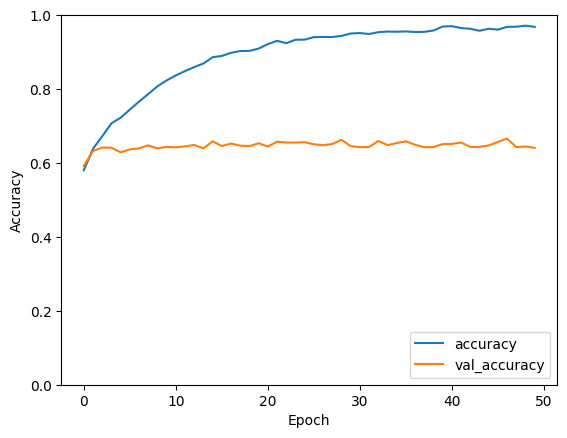

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6430 - loss: 2.0197
Test accuracy: 0.6484


In [6]:
import numpy as np
import scipy.io as sio
import cv2
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load data
file_path = 'C:\\Users\\UC\\Documents\\NeuMa\\22117124\\featuress.mat'
feet = sio.loadmat(file_path)
eye_tracking_data = feet['Data_ET']
Label_array_ET = feet['Label_ET']
Label_array_ET = Label_array_ET.transpose()

# Create an empty list to store the images
image_list = []

# Loop through each sample
for sample_idx in range(eye_tracking_data.shape[2]):
    # Extract X and Y coordinates for both eyes
    x_left, y_left, _, x_right, y_right, _ = eye_tracking_data[:, :, sample_idx]

    # Create a blank canvas (64x64) for the heatmap
    heatmap = np.zeros((64, 64), dtype=np.float32)

    # Scale the coordinates to match the canvas size
    scaled_x_left = (x_left * 64).astype(int)
    scaled_y_left = (y_left * 64).astype(int)
    scaled_x_right = (x_right * 64).astype(int)
    scaled_y_right = (y_right * 64).astype(int)

    # Add fixations to the heatmap
    for i in range(120):
        if 0 <= scaled_x_left[i] < 64 and 0 <= scaled_y_left[i] < 64:
            heatmap[scaled_y_left[i], scaled_x_left[i]] += 1
        if 0 <= scaled_x_right[i] < 64 and 0 <= scaled_y_right[i] < 64:
            heatmap[scaled_y_right[i], scaled_x_right[i]] += 1

    # Normalize the heatmap values to [0, 1]
    heatmap /= np.max(heatmap)

    # Convert to 8-bit image (0-255)
    heatmap *= 255
    heatmap = heatmap.astype(np.uint8)

    # Resize the heatmap to 64x64
    resized_heatmap = cv2.resize(heatmap, (64, 64))

    # Append the resized heatmap to the image list
    image_list.append(resized_heatmap)

# Convert the list of images to a NumPy array
image_array = np.array(image_list)

# Reshape images to have a single channel (grayscale)
image_array = np.expand_dims(image_array, axis=-1)

# Balance the data using SMOTE
smote = SMOTE(random_state=42)
image_array_resampled, Label_array_ET_resampled = smote.fit_resample(image_array.reshape(-1, 64*64), Label_array_ET)

# Reshape the resampled data back to the original shape
image_array_resampled = image_array_resampled.reshape(-1, 64, 64, 1)

# Split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(image_array_resampled, Label_array_ET_resampled, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Define LeNet-5 architecture
model = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
